In [393]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [443]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


## Introduction

Predicting life expectancy is a critical area of study that intersects healthcare, public policy, and data science. By estimating how long individuals are likely to live based on various factors, stakeholders can make informed decisions that potentially improve health outcomes and optimize resource allocation. This Life expectancy prediction model can be leveraged to analyze demographic, environmental, and health-related data.

The goal of predictive models:

Public Health Initiatives: Governments and health organizations can target interventions, plan healthcare facilities, and prioritize resources effectively to areas or populations at risk. <br>
Insurance Industry: Life insurance companies use these predictions to assess risk, set premiums, and develop new products that match the longevity trends. <br>
Medical Research: Understanding the impact of specific factors on life expectancy can guide research into diseases, treatments, and prevention strategies. <br>
Economic Planning: Economists and planners can forecast pension requirements, retirement benefits, and the future workforce's structure. <br>



In [444]:
# Read the dataset
life = pd.read_csv("/content/drive/MyDrive/IS670_data/Life Expectancy Data.csv")
life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [445]:
life.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [446]:
life.columns = [col.replace(' ', '') for col in life.columns]
life.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

Country: The country in which the data was collected.<br>
Year: The year of the data entry.<br>
Status: The status of the country, such as "Developing" or "Developed".<br>
Life expectancy: The average number of years a person is expected to live.<br>
Adult Mortality: The adult mortality rate (probability of dying between 15 and 60 years per 1000 population).<br>
infant deaths: The number of infant deaths per 1000 population.<br>
Alcohol: The recorded per capita (per person) alcohol consumption.<br>
percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita.<br>
Hepatitis B: Hepatitis B immunization coverage among 1-year-olds (%).<br>
Measles: The number of reported cases of measles per 1000 population.<br>
BMI: Average Body Mass Index of the population.<br>
under-five deaths: The number of under-five deaths per 1000 population.<br>
Polio: Polio immunization coverage among 1-year-olds (%).<br>
Total expenditure: General government expenditure on health as a percentage of total government expenditure.<br>
Diphtheria: DTP3 immunization coverage among 1-year-olds (%).<br>
HIV/AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years).<br>
GDP: Gross Domestic Product per capita (in USD).<br>
Population: The population of the country.<br>
thinness 1-19 years: Prevalence of thinness among children and adolescents for 1 to 19 years old (%).<br>
thinness 5-9 years: Prevalence of thinness among children for 5 to 9 years old (%).<br>
Income composition of resources: Human Development Index in terms of income composition of resources.<br>
Schooling: Average number of years of schooling of the population.<br>

In [447]:
# Converting object type to category type
life = life.astype({col: 'category' for col in life.columns if life[col].dtype == 'object'})


In [448]:
# Selecting the category type columns
life.select_dtypes(include=['category']).columns

Index(['Country', 'Status'], dtype='object')

In [449]:
life['Country_ID'] = life['Country'].cat.codes
life['status_summary'] = life['Status'].cat.codes
life['Country_ID'] = life['Country_ID'] + 1

In [450]:
# Checking for null values
life.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
Country_ID                        0
status_summary                    0
dtype: int64

In [451]:
life.loc[life['Polio'].isna()]

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Country_ID,status_summary
1742,Montenegro,2005,Developing,73.6,133.0,0,NaN,527.307672,NaN,0,...,NaN,0.1,3674.617924,614261.0,2.3,2.3,0.746,12.8,113,1
1743,Montenegro,2004,Developing,73.5,134.0,0,0.01,57.121901,NaN,0,...,NaN,0.1,338.199535,613353.0,2.3,2.4,0.740,12.6,113,1
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,NaN,0,...,NaN,0.1,2789.173500,612267.0,2.4,2.4,0.000,0.0,113,1
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,NaN,0,...,NaN,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0,113,1
1746,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,NaN,0,...,NaN,0.1,199.583957,67389.0,2.5,2.6,0.000,0.0,113,1
1747,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,NaN,0,...,NaN,0.1,1627.428930,6495.0,2.6,2.7,0.000,0.0,113,1
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,...,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0,160,1
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,...,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0,160,1
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,...,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0,160,1
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,NaN,0,...,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0,160,1


In [452]:
indexes_to_drop = life[life['Country'].isin(['Sudan', 'South Sudan', 'Montenegro', 'Timor-Leste'])].index
life = life.drop(indexes_to_drop)

In [453]:
life['Alcohol'] = life['Alcohol'].interpolate(method='linear')
life['Totalexpenditure'] = life['Totalexpenditure'].interpolate(method='linear')
life['Schooling'] = life['Schooling'].interpolate(method='linear')
life['Incomecompositionofresources'] = life['Incomecompositionofresources'].interpolate(method='linear')
life['Lifeexpectancy'] = life['Lifeexpectancy'].interpolate(method='linear')
life['AdultMortality'] = life['AdultMortality'].interpolate(method='linear')
life['BMI'] = life['BMI'].interpolate(method='linear')
life['thinness1-19years'] = life['thinness1-19years'].interpolate(method='linear')
life['thinness5-9years'] = life['thinness5-9years'].interpolate(method='linear')

In [454]:
# Checking for null values
life.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                    0
AdultMortality                    0
infantdeaths                      0
Alcohol                           0
percentageexpenditure             0
HepatitisB                      519
Measles                           0
BMI                               0
under-fivedeaths                  0
Polio                             0
Totalexpenditure                  0
Diphtheria                        0
HIV/AIDS                          0
GDP                             440
Population                      652
thinness1-19years                 0
thinness5-9years                  0
Incomecompositionofresources      0
Schooling                         0
Country_ID                        0
status_summary                    0
dtype: int64

In [455]:
life['GDP'].fillna(life['GDP'].mean(), inplace=True)
life['Population'].fillna(life['Population'].mean(), inplace=True)

In [456]:
# Checking for null values
life.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                    0
AdultMortality                    0
infantdeaths                      0
Alcohol                           0
percentageexpenditure             0
HepatitisB                      519
Measles                           0
BMI                               0
under-fivedeaths                  0
Polio                             0
Totalexpenditure                  0
Diphtheria                        0
HIV/AIDS                          0
GDP                               0
Population                        0
thinness1-19years                 0
thinness5-9years                  0
Incomecompositionofresources      0
Schooling                         0
Country_ID                        0
status_summary                    0
dtype: int64

In [457]:
life.head(5)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Country_ID,status_summary
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,1


## Data Visualizations

Text(0.5, 1.0, 'Distribution of Life Expectancy')

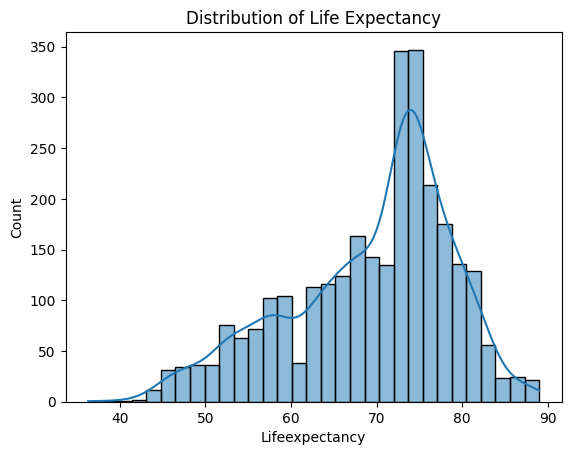

In [458]:

# Distibution of life Expectancy ratings
sns.histplot(data=life, x="Lifeexpectancy", kde=True)
plt.title('Distribution of Life Expectancy')

From the chart, we can see that most of the data points are clustered around the 70 to 75 years range, indicating that this is the most common life expectancy in the dataset. The distribution appears to be roughly normal but slightly left-skewed, meaning there are fewer instances of very low life expectancy and a longer tail on the left side of the distribution.

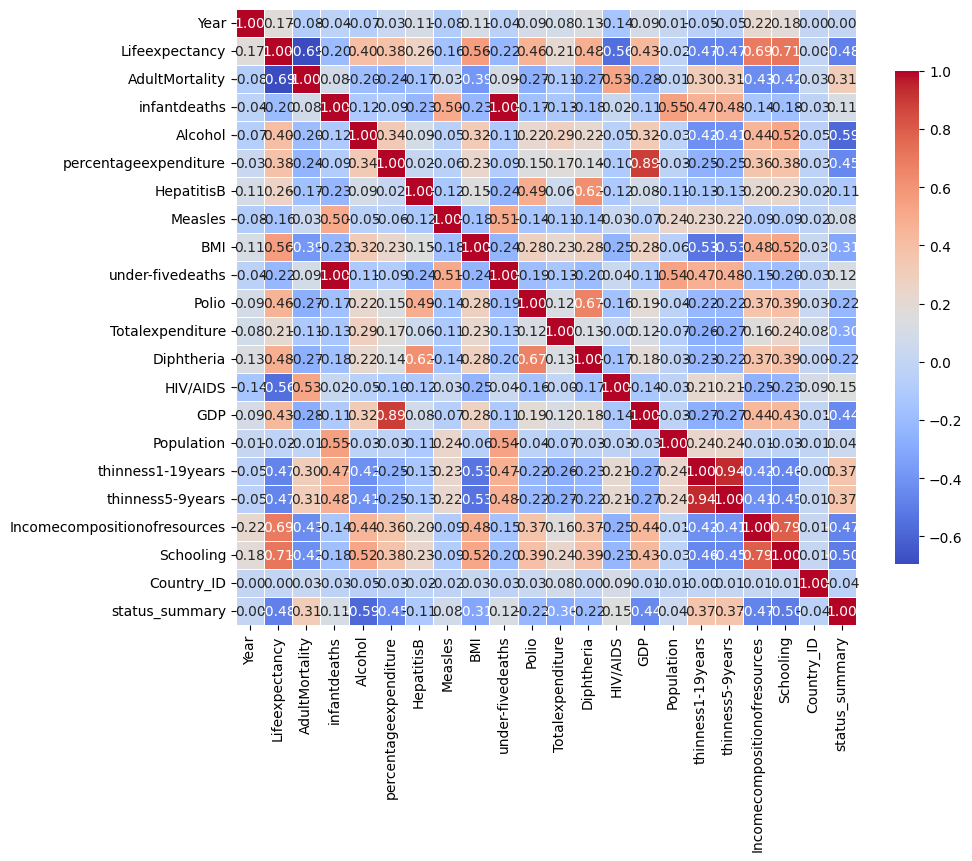

In [459]:
# Getting the correlation matrix for numeric variables
corr = life.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8})
plt.show()

In [460]:
columns_to_drop = ['under-fivedeaths', 'percentageexpenditure', 'thinness5-9years', 'Incomecompositionofresources', 'HepatitisB', 'Country', 'Status']
life = life.drop(columns=columns_to_drop)

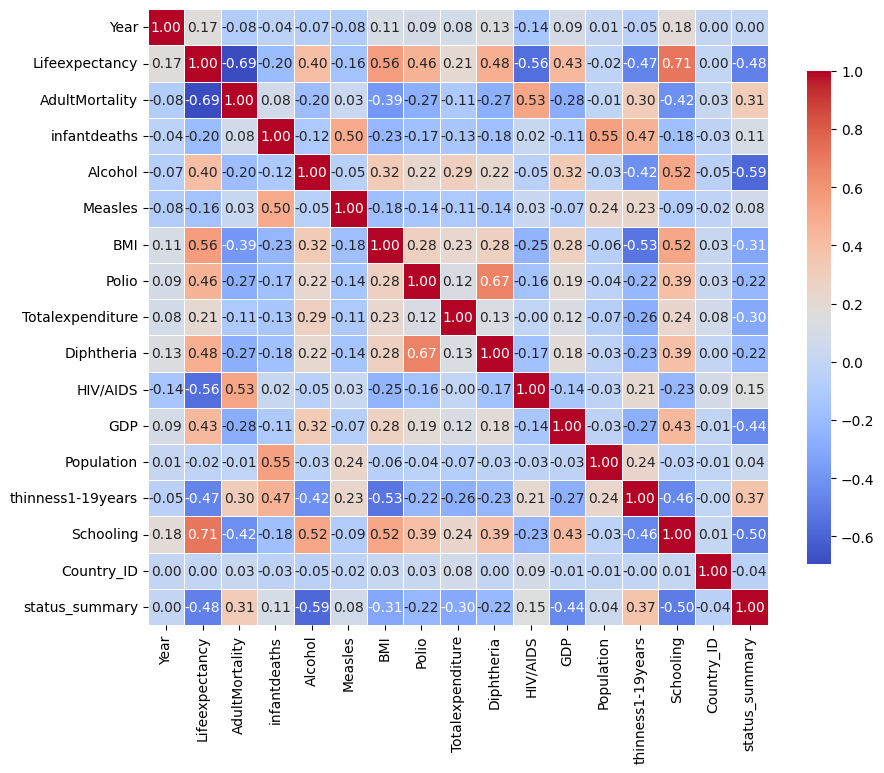

In [461]:
# Getting the correlation matrix for numeric variables
corr = life.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8})
plt.show()

In [462]:
life.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,Measles,BMI,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,Schooling,Country_ID,status_summary
count,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2.874000e+03,2874.000000,2874.000000,2874.000000,2874.000000
mean,2007.519137,69.336813,163.682498,30.451287,4.608392,2453.935630,38.391145,82.762700,5.961661,82.521573,1.757829,7609.527672,1.295806e+07,4.821155,12.180811,94.851427,0.821851
std,4.613931,9.510604,124.227130,119.164851,4.006306,11588.288054,20.012665,23.314286,2.437625,23.640591,5.127703,13255.802450,5.437683e+07,4.412122,3.208748,56.134329,0.382705
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,3.000000,1.100000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.000000,1.000000,0.000000
25%,2004.000000,63.400000,73.000000,0.000000,0.970000,0.000000,19.500000,78.000000,4.340000,78.250000,0.100000,583.723224,4.293000e+05,1.600000,10.300000,46.000000,1.000000
50%,2008.000000,72.150000,143.000000,3.000000,3.795000,17.000000,43.500000,93.000000,5.760000,93.000000,0.100000,3173.223830,3.800232e+06,3.300000,12.500000,92.000000,1.000000
75%,2012.000000,75.800000,225.000000,21.000000,7.615000,356.250000,56.200000,97.000000,7.440000,97.000000,0.800000,7609.527672,1.295806e+07,7.100000,14.300000,144.000000,1.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,212183.000000,87.300000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,20.700000,193.000000,1.000000


## Prediction Models

In [463]:
# Partition the data
target = life['Lifeexpectancy']
predictors = life.drop(['Lifeexpectancy'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(2011, 16) (863, 16) (2011,) (863,)


Simple Linear Regression

In [464]:
predictors_train.columns

Index(['Year', 'AdultMortality', 'infantdeaths', 'Alcohol', 'Measles', 'BMI',
       'Polio', 'Totalexpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Population', 'thinness1-19years', 'Schooling', 'Country_ID',
       'status_summary'],
      dtype='object')

In [465]:
model1 = linear_model.LinearRegression()
model1.fit(predictors_train[['Schooling']], target_train)

LinearRegression()

In [466]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train[['Schooling']])
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     1987.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          2.31e-302
Time:                        02:01:53   Log-Likelihood:                -6657.2
No. Observations:                2011   AIC:                         1.332e+04
Df Residuals:                    2009   BIC:                         1.333e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.2687      0.585     75.630      0.0

In [467]:
# Make predictions on testing data
prediction_on_test = model1.predict(predictors_test[['Schooling']])

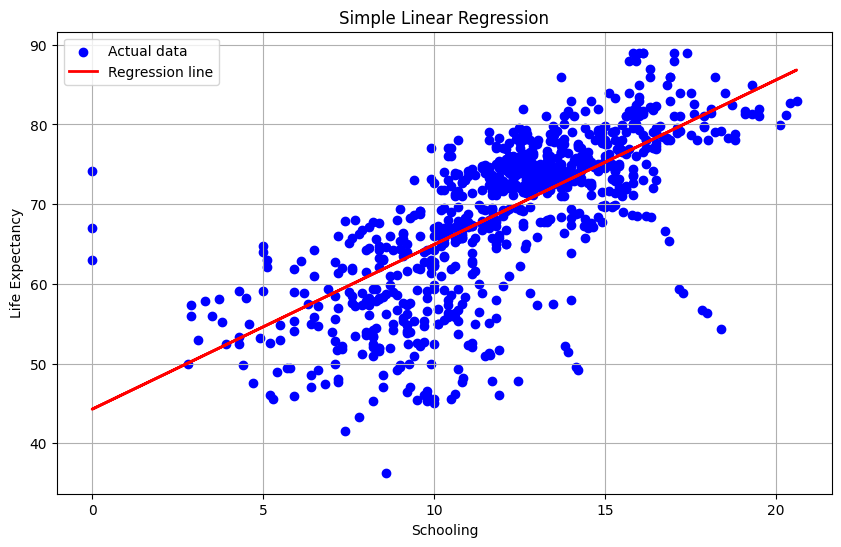

In [468]:
plt.figure(figsize=(10, 6))
plt.scatter(predictors_test[['Schooling']], target_test, color='blue', label='Actual data')
plt.plot(predictors_test[['Schooling']], prediction_on_test , color='red', linewidth=2, label='Regression line')
plt.title('Simple Linear Regression')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

In [469]:

# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 5.081997936143828
RMSE: 6.8671947756413845


Multiple Linear Regression

In [470]:
mae_models = []
rmse_models = []

In [471]:
# Build a multiple linear regression model with all predictors
model2 = linear_model.LinearRegression()
model2.fit(predictors_train, target_train)

LinearRegression()

In [472]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train)
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     522.0
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        02:02:04   Log-Likelihood:                -5693.2
No. Observations:                2011   AIC:                         1.142e+04
Df Residuals:                    1994   BIC:                         1.152e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                26.2057     41.58

In [473]:
# Make predictions on testing data
prediction_on_test = model2.predict(predictors_test)

In [474]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 3.371288426412489
RMSE: 4.589466596560348


In [475]:
mae_models.append(MAE)
rmse_models.append(RMSE)

Regression Trees

In [476]:
# Build a regression tree model with max_depth=3
model3 = DecisionTreeRegressor(random_state=0, max_depth=3)
model3.fit(predictors_train, target_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [477]:
# Make predictions on testing data
prediction_on_test = model3.predict(predictors_test)

In [478]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 3.144415614016093
RMSE: 4.254161990578302


In [479]:
mae_models.append(MAE)
rmse_models.append(RMSE)

[Text(0.5, 0.875, 'HIV/AIDS <= 0.55\nsquared_error = 87.413\nsamples = 2011\nvalue = 69.517'),
 Text(0.25, 0.625, 'AdultMortality <= 161.5\nsquared_error = 32.615\nsamples = 1465\nvalue = 73.797'),
 Text(0.125, 0.375, 'Schooling <= 14.722\nsquared_error = 21.186\nsamples = 1045\nvalue = 76.02'),
 Text(0.0625, 0.125, 'squared_error = 15.125\nsamples = 679\nvalue = 74.202'),
 Text(0.1875, 0.125, 'squared_error = 14.916\nsamples = 366\nvalue = 79.394'),
 Text(0.375, 0.375, 'Schooling <= 10.35\nsquared_error = 18.133\nsamples = 420\nvalue = 68.263'),
 Text(0.3125, 0.125, 'squared_error = 11.023\nsamples = 109\nvalue = 63.613'),
 Text(0.4375, 0.125, 'squared_error = 10.388\nsamples = 311\nvalue = 69.893'),
 Text(0.75, 0.625, 'AdultMortality <= 331.5\nsquared_error = 53.417\nsamples = 546\nvalue = 58.033'),
 Text(0.625, 0.375, 'BMI <= 34.05\nsquared_error = 45.136\nsamples = 354\nvalue = 61.078'),
 Text(0.5625, 0.125, 'squared_error = 34.989\nsamples = 267\nvalue = 58.972'),
 Text(0.6875, 0.

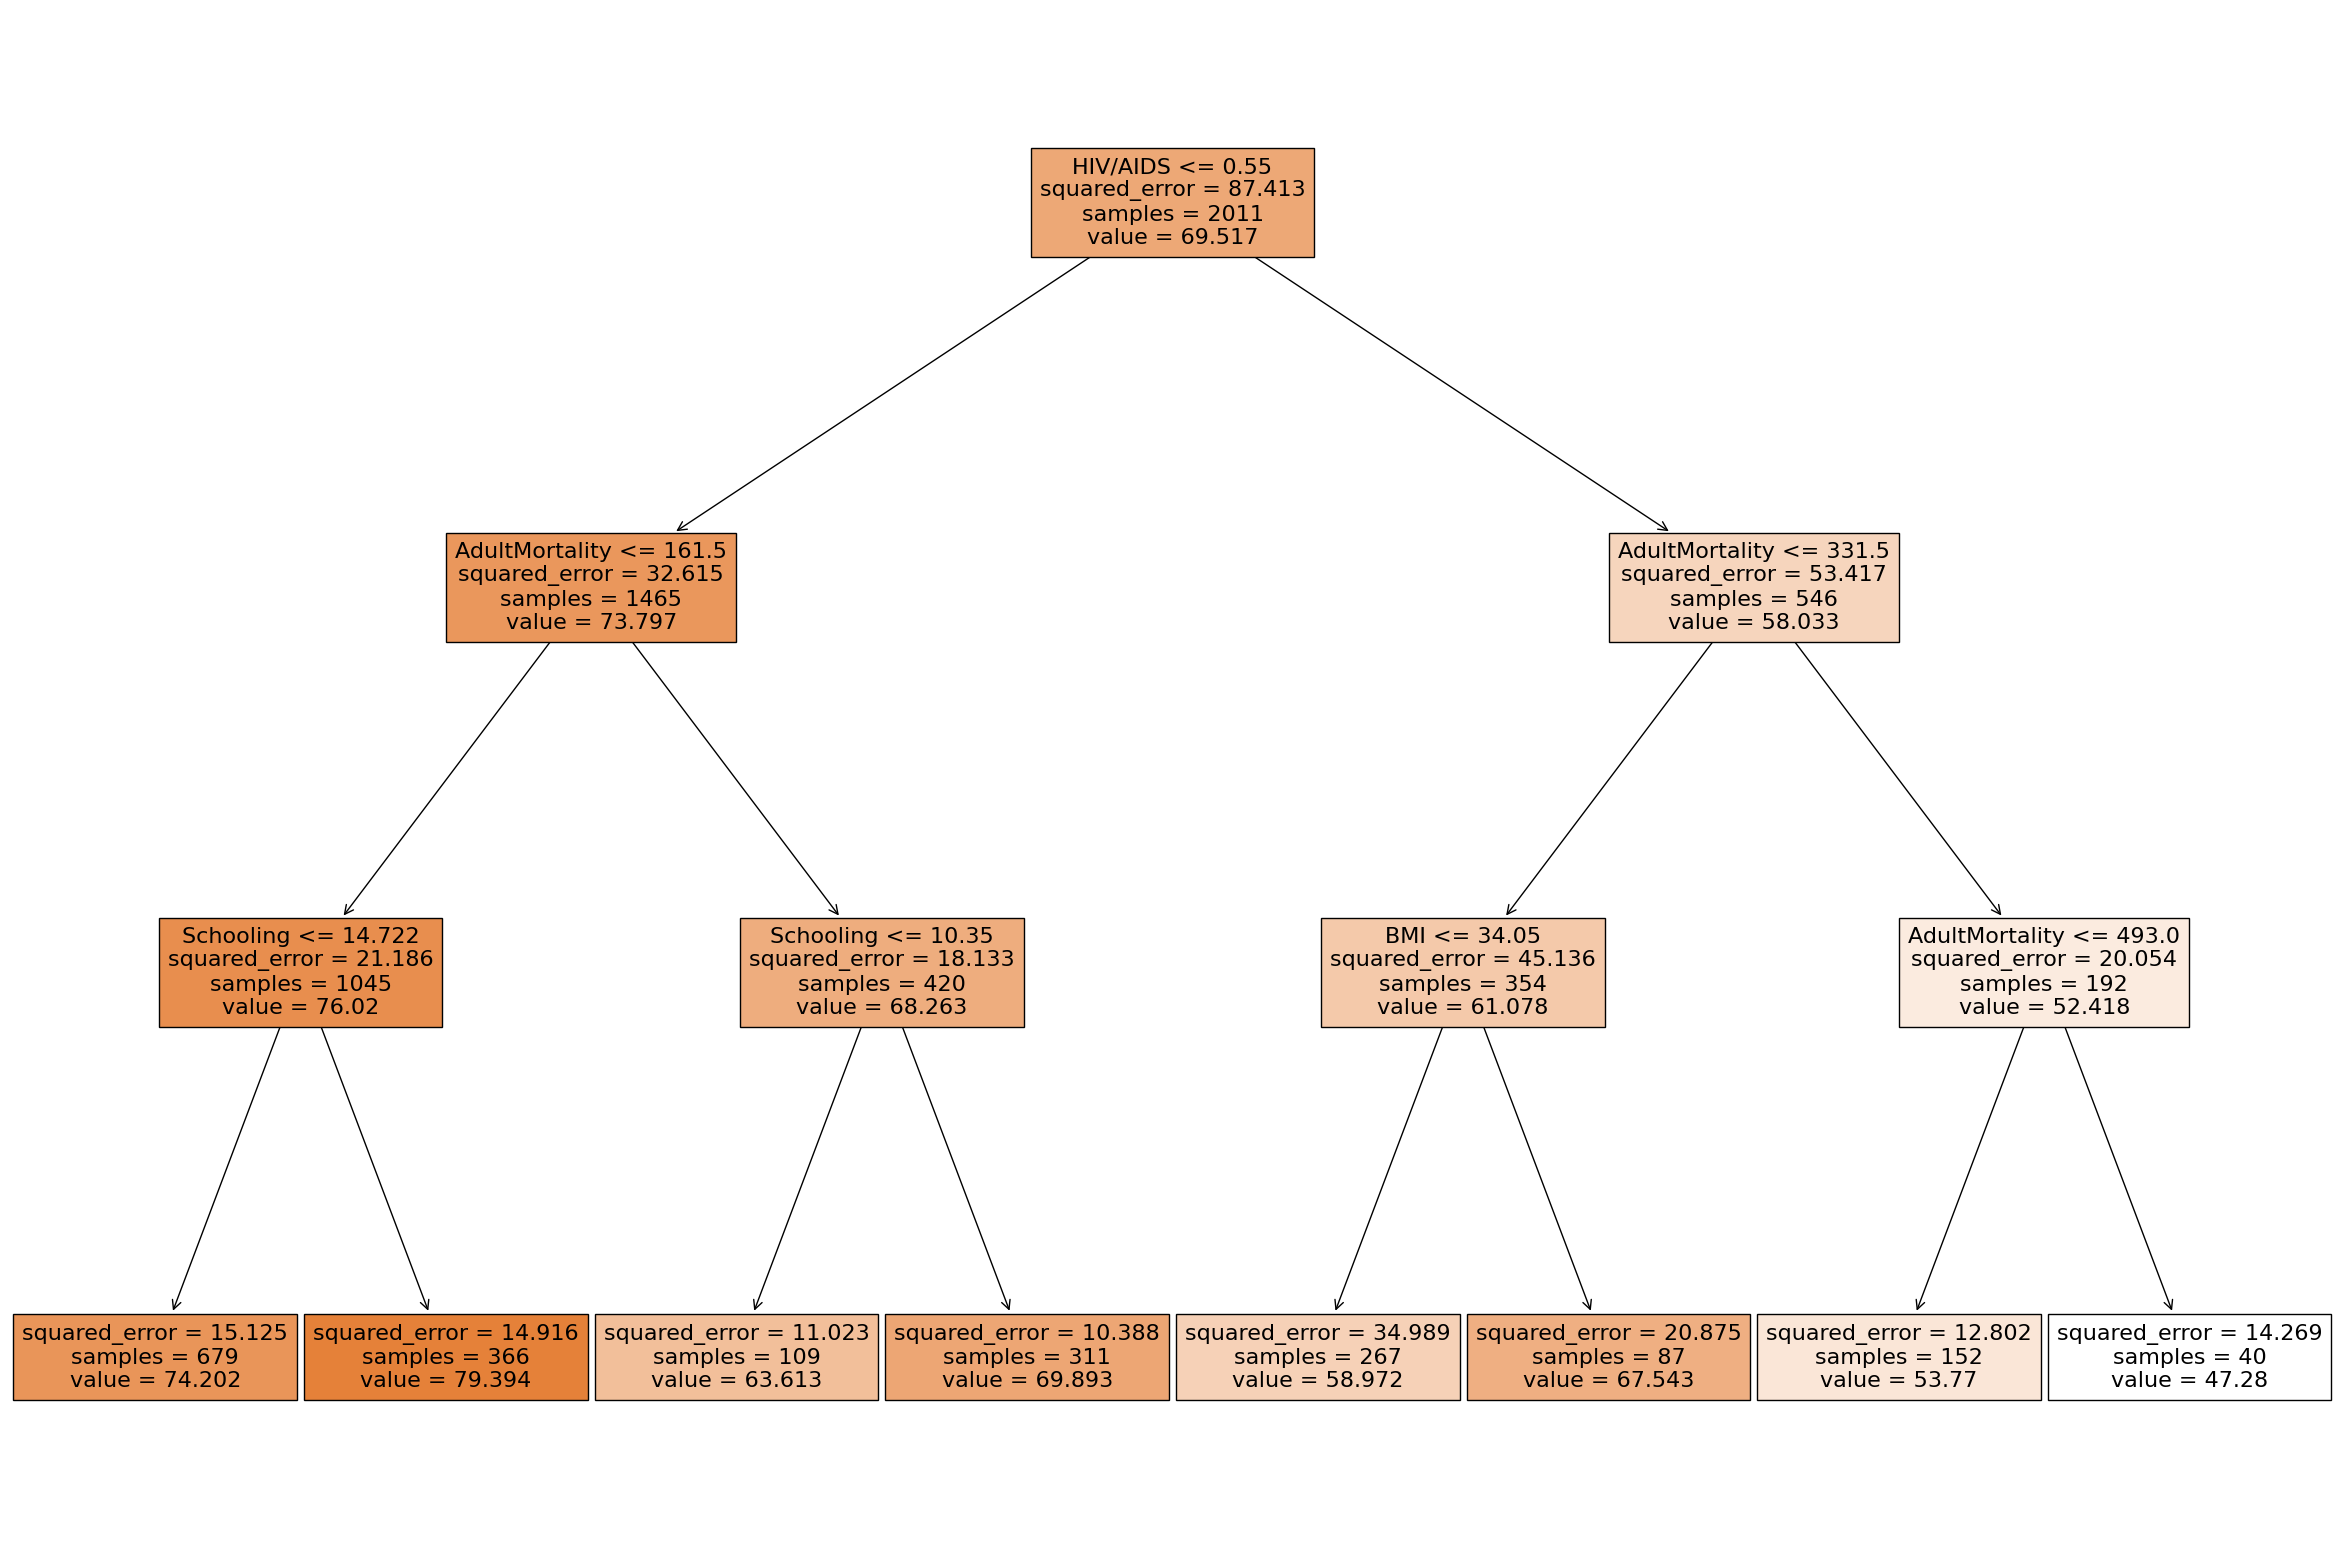

In [480]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model3,
               feature_names=list(predictors_train.columns),
               filled=True)

Support Vector Machine

In [481]:
# Build a SVM model with default setting (C = 1.0)
model4 = SVR(C = 4)
model4.fit(predictors_train, target_train)

SVR(C=4)

In [482]:
prediction_on_test = model4.predict(predictors_test)

In [483]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 7.771057693646374
RMSE: 10.38957563871882


In [484]:
mae_models.append(MAE)
rmse_models.append(RMSE)

Multi-layer Perceptron (MLP)

In [485]:
model5 = MLPRegressor(hidden_layer_sizes=(8, 4, 4), random_state=1)
model5.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(8, 4, 4), random_state=1)

In [486]:
# Make predictions on testing data
prediction_on_test = model5.predict(predictors_test)

In [487]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 66.30471187163467
RMSE: 67.04769291510353


In [488]:
mae_models.append(MAE)
rmse_models.append(RMSE)

In [489]:
models = ['Multiple Linear Regression', 'Regression Tree', 'SVM', 'MLP']

In [490]:
model_performance = pd.DataFrame({
    'Model': models,
    'MAE': mae_models,
    'RMSE': rmse_models
})

print(model_performance)

                        Model        MAE       RMSE
0  Multiple Linear Regression   3.371288   4.589467
1             Regression Tree   3.144416   4.254162
2                         SVM   7.771058  10.389576
3                         MLP  66.304712  67.047693


##Summary

Started by loading a dataset to understand its structure and key characteristics. The dataset is then checked for missing values, which are critical to address to maintain the dataset's quality. Missing values are filled using interpolation methods, ensuring the dataset remains intact and representative.

After preparing the data, a correlation analysis is conducted to examine the relationships between features. This step identifies highly correlated features, which are removed to prevent multicollinearity, thus improving the models' effectiveness.

The cleaned dataset is then used to develop predictive models that explore the complex relationships within the data, aiming to provide accurate and insightful predictions.

## Model Analysis

### Multiple Linear Regression

The regression analysis indicates a robust model with an R-squared value of 0.807, suggesting that approximately 80.7% of the variability in life expectancy is explained by the model's predictors. The model uses Ordinary Least Squares (OLS) for estimation and includes several significant variables:

Adult Mortality and HIV/AIDS: Both have negative coefficients, indicating an inverse relationship with life expectancy.
BMI, Polio, Diphtheria, GDP, and Schooling: These variables have positive coefficients, suggesting that higher values are associated with an increase in life expectancy.
Measles: This variable has a small negative coefficient, indicating a slight decrease in life expectancy with an increase in measles cases, but the effect size is very small.
Country_ID and status_summary: These coefficients are significant, with Country_ID positively related to life expectancy and status_summary negatively related.
The F-statistic is significant, indicating that the model is a good fit for the data

<br>

### Regression Trees

The initial node uses HIV/AIDS as the primary splitting criterion, indicating its strong predictive power for life expectancy, lower HIV/AIDS rates correspond to higher life expectancy. Subsequent splits are made based on AdultMortality and Schooling, showing that lower adult mortality rates and higher education levels are also critical in predicting higher life expectancy.

The tree details how each feature contributes to the model's predictions at different levels of the tree, reflecting the non-linear and hierarchical nature of the relationships in the data. For instance, in populations with low HIV/AIDS rates, adult mortality and education become the next most important factors. Conversely, in populations with higher HIV/AIDS rates, adult mortality continues to play a significant role.

The model's performance is quantified by the mean absolute error (MAE) and the root mean square error (RMSE), with values of approximately 3.14 and 4.25, respectively. These metrics suggest the model's average error in predicting life expectancy in years.

In summary, HIV/AIDS, AdultMortality, and Schooling are key features in the model that significantly impact life expectancy predictions. The model has demonstrated an ability to capture complex patterns in the data with a reasonable level of accuracy.

### SVM and MLP
For the SVR model, the MAE and RMSE indicate moderate prediction errors, which might be acceptable depending on the specific context or the variance present in the life expectancy data. On the other hand, the MLP model shows significantly higher errors, suggesting much poorer performance in its current configuration.

### Over comaparision

Multiple Linear Regression has an MAE of 3.371 and an RMSE of 4.589. This indicates that on average, the linear regression predictions are about 3.371 years off from the actual life expectancy values, and the spread of these errors is about 4.589 years.

Regression Tree shows a slightly better performance with an MAE of 3.144 and an RMSE of 4.254. This model has the lowest error rates among the four, suggesting that it's the most accurate in predicting life expectancy.

SVM (Support Vector Machine) has a higher MAE and RMSE of 7.771 and 10.390, respectively, indicating that its predictions are less accurate than those from the Multiple Linear Regression and Regression Tree models.

MLP (Multilayer Perceptron) has significantly higher errors, with an MAE of 66.305 and an RMSE of 67.048. This suggests that the MLP's predictions are, on average, about 66 years off from the actual values, with a similarly large spread of errors, indicating very poor performance.

In summary, the Regression Tree model appears to be the most accurate for this dataset, closely followed by Multiple Linear Regression. The SVM performs less well, and the MLP significantly underperforms in comparison to the other models. To improve the MLP's performance, investigating its architecture, hyperparameters, data scaling, and feature engineering might be necessary.


## Conclusion

After analyzing the models, it is evident that Regression Trees may be more suited for predicting life expectancy when the relationships between predictors and outcomes are complex and non-linear. This model's flexibility in handling different data types and its capability to uncover intricate interactions between variables make it particularly useful for capturing the diverse influences on life expectancy, especially when the data set includes categorical variables that interact in non-linear ways.

On the other hand, Linear Regression proves advantageous when the relationships in the data are expected to be linear. This model is invaluable for its straightforward interpretability, allowing for a clear understanding of how each predictor impacts life expectancy. The coefficient values from linear regression provide explicit insights, showing the extent to which life expectancy changes with adjustments in predictor variables, which is crucial for forming direct policy implications and strategic health interventions.

In [491]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Saipreethi_Poka_3_1.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Saipreethi_Poka_3_1.ipynb to html
[NbConvertApp] Writing 1983844 bytes to /content/drive/MyDrive/Colab Notebooks/Saipreethi_Poka_3_1.html
